<a href="https://colab.research.google.com/github/Nalishaa/Bank-Customer-Churn-Prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bank Customer Churn Prediction**
Customer churn prediction is the task of identifying customers who are likely to stop using a company's products or services in the future. For banks, customer churn is a critical metric, as retaining customers is often more cost-effective than acquiring new ones. Predicting which customers are at risk of leaving can help in designing targeted retention strategies.

The target variable is whether the customer has churned. A churned customer is someone who has closed their account or stopped using the bank's services within a specified period.

### **Dataset**
The dataset contains information such as customer demographics, account usage patterns, service interactions, and whether the customer has churned or not. It consists of 10,000 rows and 12 columns.The goal is to predict whether a customer will churn.

### **Process**

1.   Importing Libraries
2.   Load the Dataset
3.   Exploratory Data Analysis (EDA)
4.   Train-Test Splitting
5.   Model Training and Metrics

### **Objective**

This project aims to predict customer churn using a Logistic Regression classification technique. By analyzing customer behavior and demographics, predictive models like Logistic Regression can forecast churn risk, enabling proactive measures for customer retention.

### 1. Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score ,accuracy_score,precision_score, roc_auc_score

### 2. Load the Dataset

In [13]:
Data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")
Data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Exploratory Data Analysis (EDA)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [15]:
Data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [54]:
# One-Hot Encoding for categorical variables
Data_encoded = pd.get_dummies(Data)
print(Data_encoded)
correlation_matrix = Data_encoded.corr()

      credit_score  country  gender  age  tenure    balance  products_number  \
0              619        0       0   42       2       0.00                1   
1              608        2       0   41       1   83807.86                1   
2              502        0       0   42       8  159660.80                3   
3              699        0       0   39       1       0.00                2   
4              850        2       0   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771        0       1   39       5       0.00                2   
9996           516        0       1   35      10   57369.61                1   
9997           709        0       0   36       7       0.00                1   
9998           772        1       1   42       3   75075.31                2   
9999           792        0       0   28       4  130142.79                1   

      credit_card  active_member  estim

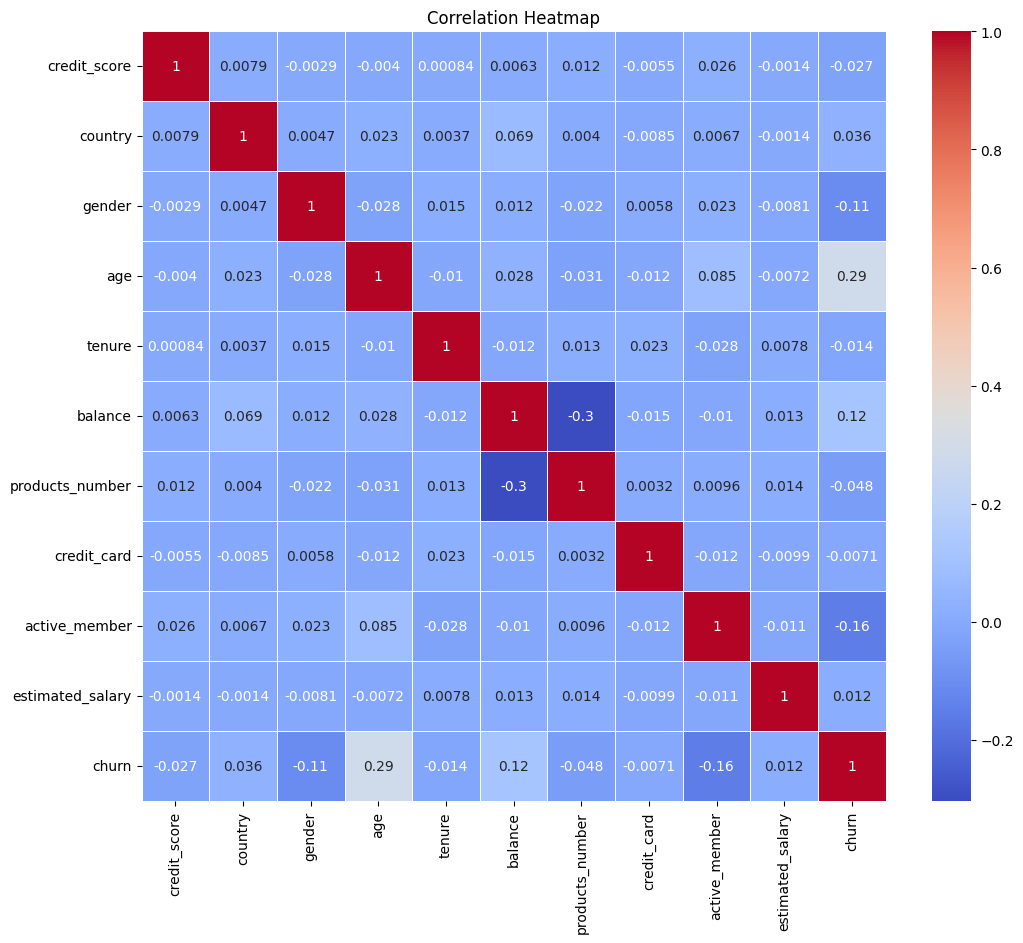

In [58]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Distribution of categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
print("Summary of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature} value counts:\n", Data[feature].value_counts())

Summary of Categorical Features:

country value counts:
 country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

gender value counts:
 gender
Male      5457
Female    4543
Name: count, dtype: int64

credit_card value counts:
 credit_card
1    7055
0    2945
Name: count, dtype: int64

active_member value counts:
 active_member
1    5151
0    4849
Name: count, dtype: int64


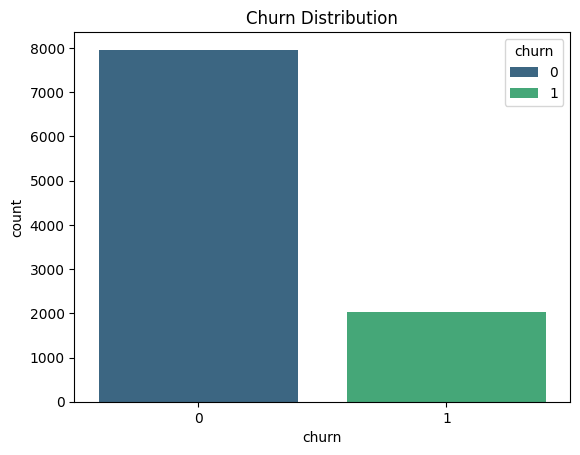

In [19]:
# Churn Distribution
sns.countplot(x='churn', data=Data, hue='churn', palette="viridis")
plt.title('Churn Distribution')
plt.show()

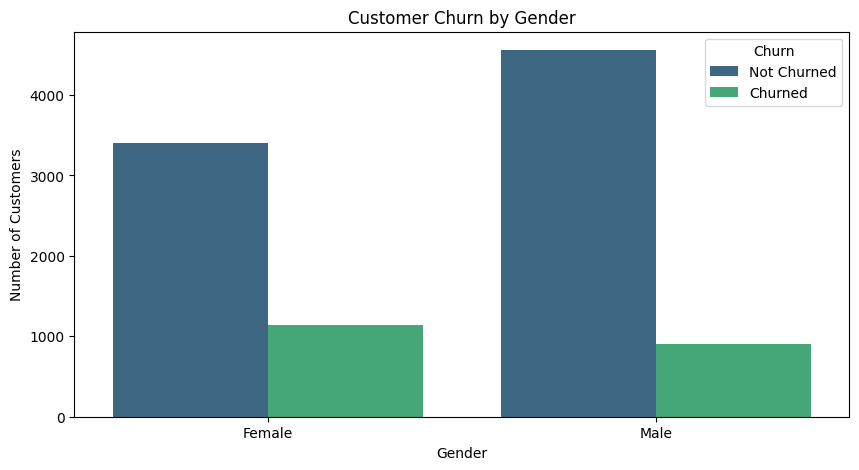

In [20]:
# Bar Chart for Churn by Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='churn', data=Data, palette='viridis')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

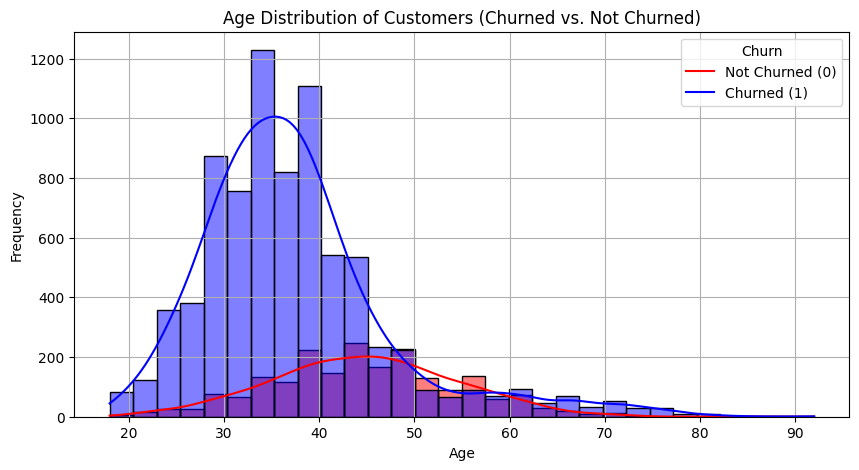

In [21]:
# Histogram: Age vs Churn
plt.figure(figsize=(10, 5))
sns.histplot(Data, x='age', bins=30, hue='churn', kde=True, palette=['blue', 'red'], alpha=0.5)
plt.title('Age Distribution of Customers (Churned vs. Not Churned)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid()
plt.show()

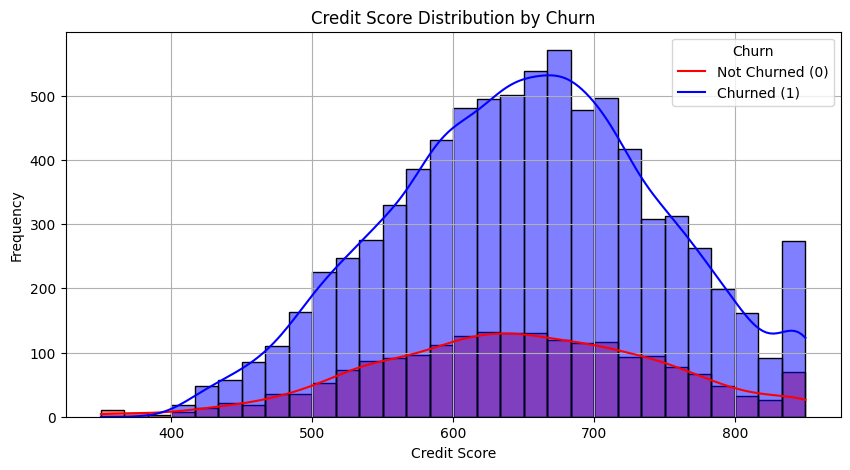

In [22]:
# Histogram: Credit_score vs Churn
plt.figure(figsize=(10, 5))
sns.histplot(Data, x='credit_score', bins=30, hue='churn', kde=True, palette=['blue', 'red'], alpha=0.5)
plt.title('Credit Score Distribution by Churn')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid()
plt.show()

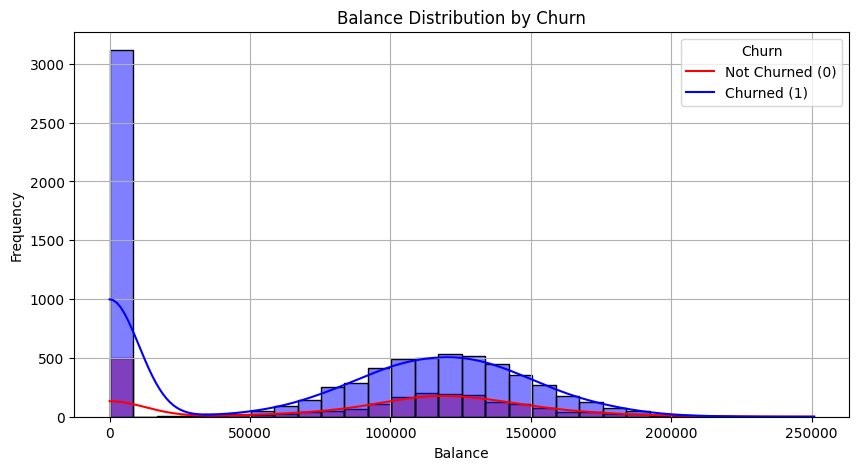

In [23]:
# Histogram: Balance vs Churn
plt.figure(figsize=(10, 5))
sns.histplot(Data, x='balance', bins=30, hue='churn', kde=True, palette=['blue', 'red'], alpha=0.5)
plt.title('Balance Distribution by Churn')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid()
plt.show()

In [24]:
# Churn by Active Member
churn_by_active_member = Data.groupby('active_member')['churn'].mean()
print("\nChurn Rate by Active Member:\n", churn_by_active_member)


Churn Rate by Active Member:
 active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


In [25]:
# Churn by Tenure
print("\nTenure by Churn:\n", Data.groupby('churn')['tenure'].mean())


Tenure by Churn:
 churn
0    5.033279
1    4.932744
Name: tenure, dtype: float64


In [26]:
# Churn by Estimated Salary
churn_by_salary= Data.groupby('churn')['estimated_salary'].mean()
print("\nEstimated Salary by Churn:\n",churn_by_salary)


Estimated Salary by Churn:
 churn
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64


### 4. Train-Test Splitting

In [27]:
# Encoding categorical features
label_encoder = LabelEncoder()

Data['country'] = label_encoder.fit_transform(Data['country'])
Data['gender'] = label_encoder.fit_transform(Data['gender'])

In [28]:
# Dropping Column
Data.drop(columns=['customer_id'], inplace=True)
Data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [29]:
# Splitting data into features (X) and target (y)
X = Data.drop('churn', axis=1)
y = Data['churn']

In [30]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


### 5. Model Training and Metrics

In [33]:
# Churn Prediction Function
def predict_churn(model, scaler, input_data):

    # Convert the input data to a numpy array
    input_data = np.array(input_data).reshape(1, -1)

    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

In [34]:
# Result
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]
# Converting input_data to a DataFrame with the same columns as the training data (X_train)
input_df = pd.DataFrame([input_data], columns=X_train.columns)
# Using the scaler to transform the input data
input_scaled = scaler.transform(input_df)
# Logistic Regression model
model_1 = log_reg
# Predict the churn result
result = model_1.predict(input_scaled)
# Print the result
if result[0] == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is unlikely to churn.")

The customer is unlikely to churn.


In [46]:
# Accuracy
y_pred=model_1.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8155

In [47]:
#confusion matrix
arr=confusion_matrix(y_test,y_pred)
print(arr)

#true negatives {0,0}
#false negatives{1,0}
#true positives{1,1}
#false positives{0,1}
tp=arr[1][1]
tn=arr[0][0]
fp=arr[0][1]
fn=arr[1][0]
print(tp)

[[1559   48]
 [ 321   72]]
72


In [48]:
# Precision, Recall, F1-score
precision=tp/(tp+fp)
print(precision)

recall=tp/(tp+fn)
print(recall)

f1score=(2*precision*recall)/(precision+recall)
print(f1score)

0.6
0.183206106870229
0.2807017543859649


In [35]:
# Model Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Confusion Matrix:
 [[1559   48]
 [ 321   72]]


In [38]:
# Logistic Regression ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

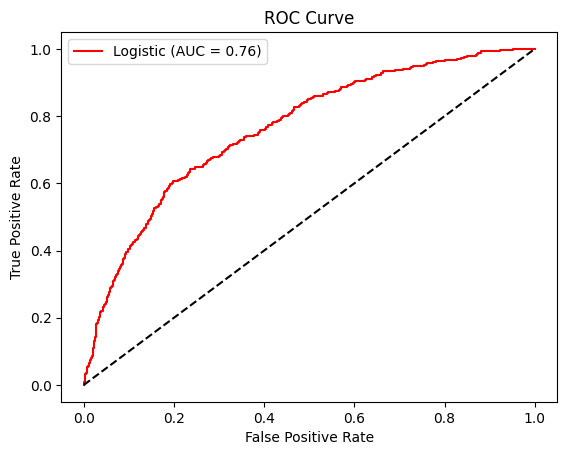

In [39]:
# Plotting ROC Curve
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_log:.2f})", color="red")
plt.plot([0, 1], [0, 1], 'k--')  # Black dashed line for reference
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()